In [8]:
%matplotlib inline
import pywt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns


from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

filename = 'facies_vectors.csv'
training_data = pd.read_csv(filename)
training_data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [9]:
len(np.unique(training_data['Well Name']))

10

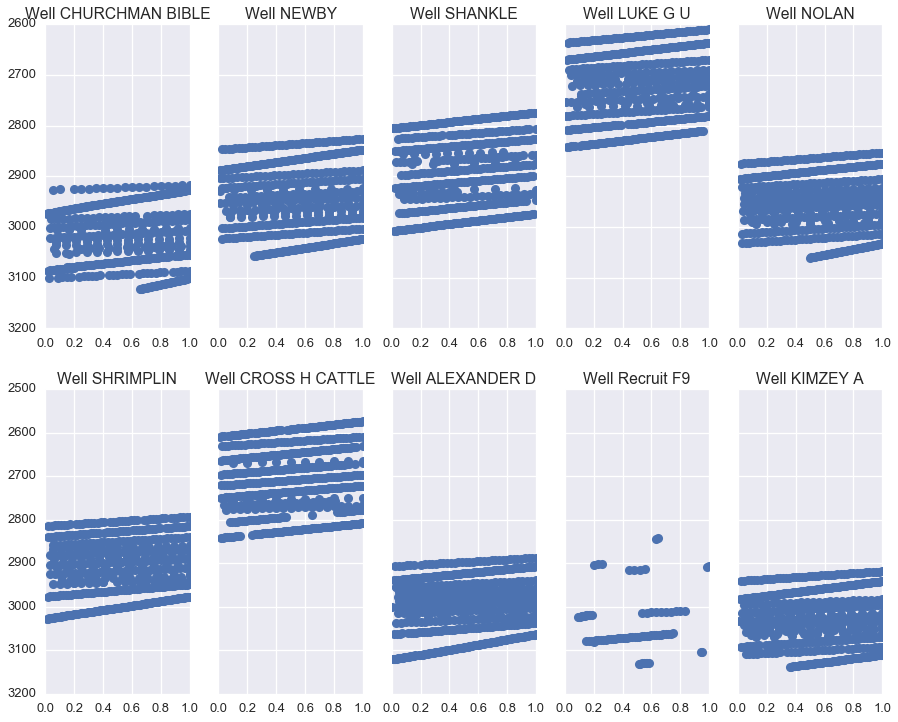

In [19]:
sns.set_context("talk")
nrows=2
fig, axs = plt.subplots(figsize=(15,12), 
                        nrows=nrows, ncols=5,     # fix as above
                        #gridspec_kw=dict(hspace=0.4),
                        sharey='row',sharex=False) # Much control of gridspec

grouped = training_data.groupby(['Well Name'])
targets = zip(grouped.groups.keys(), axs.flatten())


for i in range(nrows):
    axs[i,0].invert_yaxis()

for i, (key, ax) in enumerate(targets):
    ax.plot(grouped.get_group(key).RELPOS,grouped.get_group(key).Depth,'o')
    ax.set_title('Well %s'%key)